## Pizza Place Sales

This analysis explores a year's worth of sales data from a fictitious pizza place.

In [1]:
# importing the important libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings("ignore")
import zipfile

In [2]:
#importing the zipfile containing the 4 datasets

zip_path = r"C:\Users\bunmi\Downloads\Pizza+Place+Sales.zip"

with zipfile.ZipFile(zip_path) as z:
    z.extractall("pizza_sales")

In [3]:
#importing the 4 csv files containing the orders, order details, pizzas and pizza types

order_details = pd.read_csv(r"C:\Users\bunmi\Downloads\pizza_sales\order_details.csv", encoding='latin1')

orders = pd.read_csv(r"C:\Users\bunmi\Downloads\pizza_sales\orders.csv", encoding='latin1')

pizza_types = pd.read_csv(r"C:\Users\bunmi\Downloads\pizza_sales\pizza_types.csv", encoding='latin1')

pizzas = pd.read_csv(r"C:\Users\bunmi\Downloads\pizza_sales\pizzas.csv", encoding='latin1')

In [4]:
#joining the order details and orders together 

pizza_sales = pd.merge(order_details, orders, on="order_id", how="inner")

print(pizza_sales.columns)

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'date', 'time'], dtype='object')


In [5]:
# merge the result with pizzas
pizza_sales = pd.merge(pizza_sales, pizzas, on="pizza_id", how="inner")

# merge the result with pizza_types
pizza_sales = pd.merge(pizza_sales, pizza_types, on="pizza_type_id", how="inner")

print(pizza_sales.columns)

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'date', 'time',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients'],
      dtype='object')


In [6]:
 #creating total sales column

pizza_sales["total_sales"] = pizza_sales["quantity"] * pizza_sales["price"] 

In [7]:
pizza_sales.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,total_sales
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [8]:
pizza_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
 12  total_sales       48620 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 4.8+ MB


In [9]:
#exporting the new merged file

pizza_sales.to_csv("pizza_sales.csv", index=False)

In [10]:
pizza_sales.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,total_sales
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


## Question 1

In [11]:
# What is the total revenue/sales?

total_sales = pizza_sales['total_sales'].sum()
print(f"{total_sales:.2f}")


817860.05


The total sales generated for the pizza place in a year is **817860.05**

## Question 2

In [12]:
# Find the total quantity sold

total_quantity = pizza_sales['quantity'].sum()

print(total_quantity)


49574


The total quantity of pizzas sold during the year is **49574** units

## Question 3

In [13]:
# Find the total orders 

total_orders = pizza_sales['order_id'].nunique()

print(f"Total Orders: {total_orders:,}")

Total Orders: 21,350


The pizza place received a total of **21,350** orders during the year.


## Question 4

In [14]:
# How many pizza types do they sell?

different_pizza_types = pizza_sales['pizza_type_id'].nunique()  # counting the unique values in the pizza_type_id column

print(f"Number of Pizza Types: {different_pizza_types}")

Number of Pizza Types: 32


The number of pizza types sold is **32**

## Question 5

In [15]:
#Find the average price of the pizzas

avg_price = pizza_sales["price"].mean()   #using mean function to find the average price

avg_price

print(f"Average Pizza Price is: {avg_price:.2f}")

Average Pizza Price is: 16.49


The Average price of the pizzas is **16.49**

## Question 6

What are the peak hours of sales?

In [16]:
pizza_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
 12  total_sales       48620 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 4.8+ MB


In [17]:
#changing time format to datetime format

pizza_sales['time'] = pd.to_datetime(pizza_sales['time'])

In [18]:
pizza_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  object        
 5   time              48620 non-null  datetime64[ns]
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  total_sales       48620 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 4.8+ MB


In [19]:
#extracting the hours from the time column

pizza_sales['hour'] = pizza_sales['time'].dt.hour

In [20]:
# Grouping the hours by the total sales to determine the peak hours

sales_by_hour = pizza_sales.groupby('hour')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)

sales_by_hour


,hour,total_sales
3,12,111877.90
4,13,106065.70
9,18,89296.85
8,17,86237.45
10,19,72628.90
7,16,70055.40
5,14,59201.40
11,20,58215.40
6,15,52992.30
2,11,44935.80


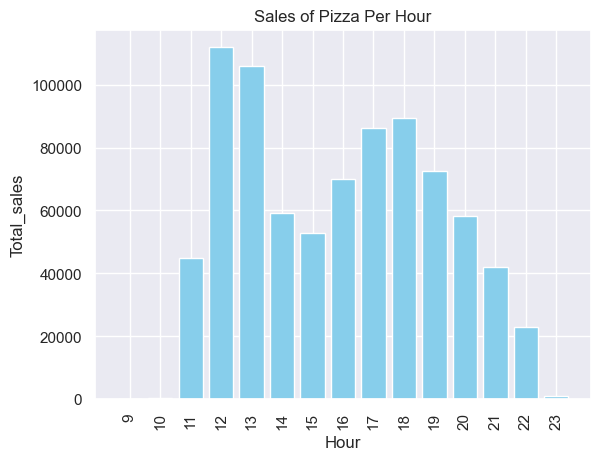

In [21]:
plt.bar(sales_by_hour["hour"], sales_by_hour["total_sales"],  color="skyblue")
plt.xticks(sales_by_hour["hour"], rotation=90)
plt.title("Sales of Pizza Per Hour")
plt.xlabel("Hour")
plt.ylabel("Total_sales")

plt.show()

The highest sales occur at **12:00**, **13:00**, and **18:00**. This pattern can be attributed to customer behavior, as **12:00–13:00** are lunch breaks for most people, while **18:00** corresponds to dinner time and social outings.

## Question 7

Total sales made on each day of the week

In [22]:
pizza_sales.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,total_sales,hour
0,1,1,hawaiian_m,1,2015-01-01,2026-02-16 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11
1,2,2,classic_dlx_m,1,2015-01-01,2026-02-16 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11
2,3,2,five_cheese_l,1,2015-01-01,2026-02-16 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11
3,4,2,ital_supr_l,1,2015-01-01,2026-02-16 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11
4,5,2,mexicana_m,1,2015-01-01,2026-02-16 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11


In [23]:
pizza_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  object        
 5   time              48620 non-null  datetime64[ns]
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  total_sales       48620 non-null  float64       
 13  hour              48620 non-null  int32         
dtypes: datetime64[ns](1), 

In [24]:
# Convert the date column to datetime format

pizza_sales['date'] = pd.to_datetime(pizza_sales['date'])

In [25]:
#Extracting the days of the week from the date column

pizza_sales['day_name'] = pd.to_datetime(pizza_sales['date']).dt.day_name()

In [26]:
# Define the correct order for days of the week

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#Grouping by the days of the week with the total sales

daily_sales = pizza_sales.groupby('day_name')['total_sales'].sum().reindex(day_order).reset_index()

daily_sales




,day_name,total_sales
0,Monday,107329.55
1,Tuesday,114133.80
2,Wednesday,114408.40
3,Thursday,123528.50
4,Friday,136073.90
5,Saturday,123182.40
6,Sunday,99203.50


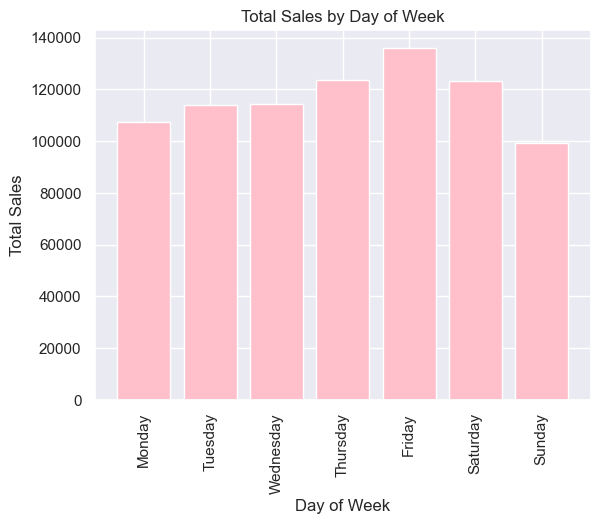

In [27]:
#plottig a  barchart to show the total sales made on each day of the week

plt.bar(daily_sales['day_name'], daily_sales['total_sales'], color="pink")
plt.xticks(rotation=90)
plt.title("Total Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.show()


The highest sales are recorded on **Friday**, while the lowest occur on **Sunday**.

## Question 8

Find the top 5 bestselling pizzas.

In [28]:
# Grouping the differnt pizzas by the sum of their total sales to find the top 5 best sellers

top_5_pizzas = pizza_sales.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)

print(top_5_pizzas)

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


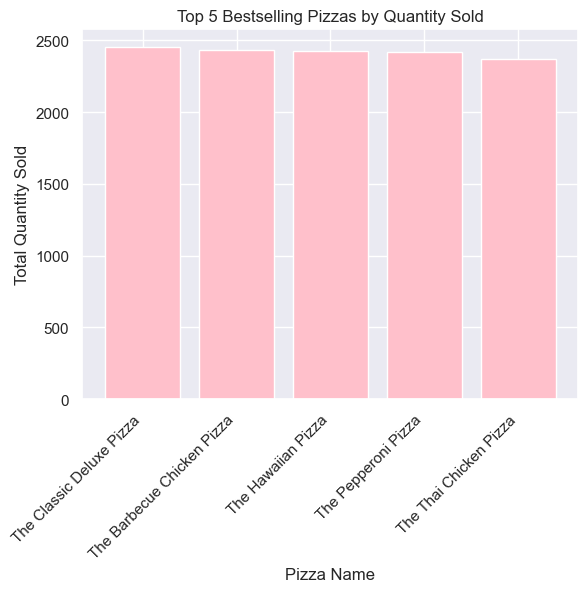

In [29]:
# Plotting a bar chart to show top 5 bestseller pizzas

plt.bar(top_5_pizzas.index, top_5_pizzas.values, color='pink')

plt.title('Top 5 Bestselling Pizzas by Quantity Sold')
plt.xlabel('Pizza Name')
plt.ylabel('Total Quantity Sold')

plt.xticks(rotation=45, ha='right')


plt.show()

The top 2 bestselling pizzas are dominated by **The Classic Deluxe Pizza** and **The Barbecue Chicken Pizza** indicating strong customer preference for these options.


## Question 9

Find the sales made in each month.

In [30]:
# Extracting the month name from the date column

pizza_sales['month'] = pd.to_datetime(pizza_sales['date']).dt.month_name()

In [31]:
# Grouping the months by their total sales

monthly_sales = (pizza_sales.groupby('month')['total_sales'].sum().reset_index())

In [32]:
# Arranging the months in calender order

month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

monthly_sales['month'] = pd.Categorical(monthly_sales['month'], categories=month_order, ordered=True)

#sorting months with their total sales
monthly_sales = monthly_sales.sort_values('month')

monthly_sales


,month,total_sales
4,January,69793.30
3,February,65159.60
7,March,70397.10
0,April,68736.80
8,May,71402.75
6,June,68230.20
5,July,72557.90
1,August,68278.25
11,September,64180.05
10,October,64027.60


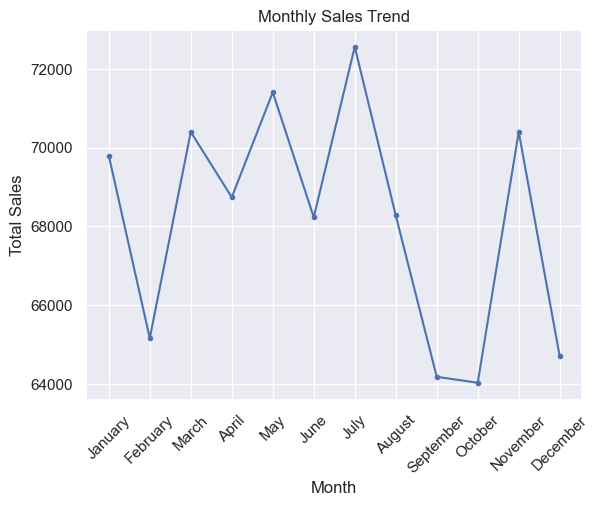

In [33]:
plt.plot(monthly_sales['month'], monthly_sales['total_sales'], marker='.')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


Sales peaked in **July** with 72557.90  and were lowest in **October** with 64027.60.

## Question 10

Are there pizza types that are not doing well on the menu?

In [34]:
# Grouping by the total quantity sold to check the pizza types not doing well

pizzas_not_doing_well = ( pizza_sales.groupby('name')['quantity'].sum().reset_index() .sort_values(by='quantity', ascending=True).head(5))

pizzas_not_doing_well 

,name,quantity
2,The Brie Carre Pizza,490
16,The Mediterranean Pizza,934
3,The Calabrese Pizza,937
28,The Spinach Supreme Pizza,950
24,The Soppressata Pizza,961


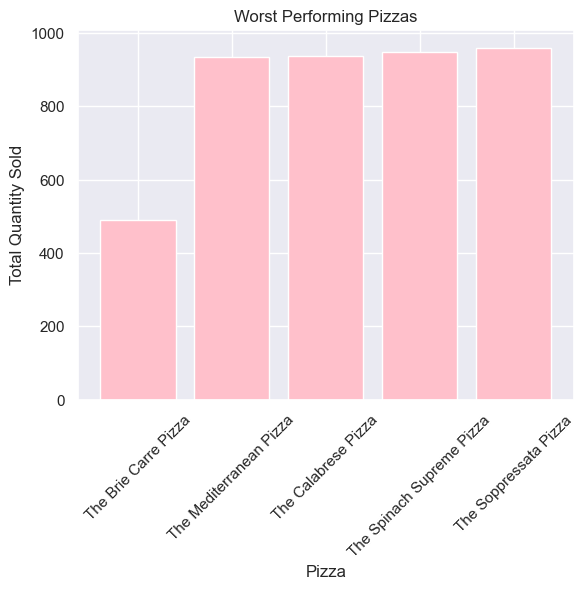

In [35]:
#plotting a bar chart to show the least 5 pizza types not doing well on the menu

plt.bar(pizzas_not_doing_well['name'], pizzas_not_doing_well['quantity'], color="pink")

plt.xticks(rotation=45)
plt.title("Worst Performing Pizzas")
plt.xlabel("Pizza")
plt.ylabel("Total Quantity Sold")

plt.show()

The least performing pizza on the menu is **The Brie Carre Pizza**, with a total of 490 units sold, indicating low customer demand.

## Pizza Size Revenue

Checking which pizza size is more profitable

In [36]:
# grouping the total sales of the pizzas by size

pizza_size = pizza_sales.groupby('size')['total_sales'].sum().sort_values(ascending=False).reset_index()

pizza_size

,size,total_sales
0,L,375318.70
1,M,249382.25
2,S,178076.50
3,XL,14076.00
4,XXL,1006.60


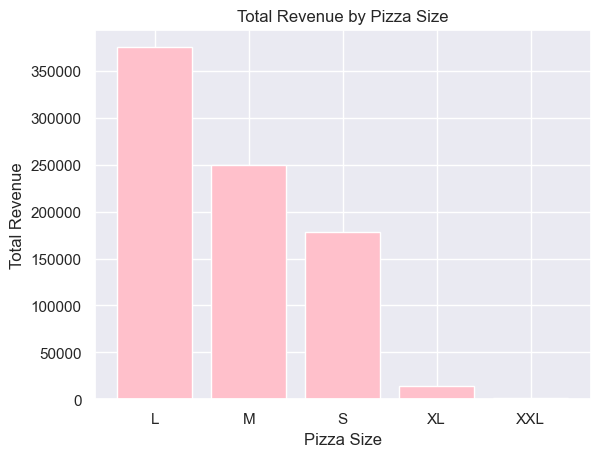

In [38]:
plt.bar(pizza_size['size'], pizza_size['total_sales'], color="pink")
plt.title("Total Revenue by Pizza Size")
plt.xlabel("Pizza Size")
plt.ylabel("Total Revenue")
plt.show()


**Large-sized pizzas** generate the highest revenue with **375318.70** in total sales.

## More Analysis

## Pizza Category

Finding which pizza category sells the most

In [39]:
pizza_category = (pizza_sales.groupby('category')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False))

pizza_category

,category,total_sales
1,Classic,220053.10
2,Supreme,208197.00
0,Chicken,195919.50
3,Veggie,193690.45


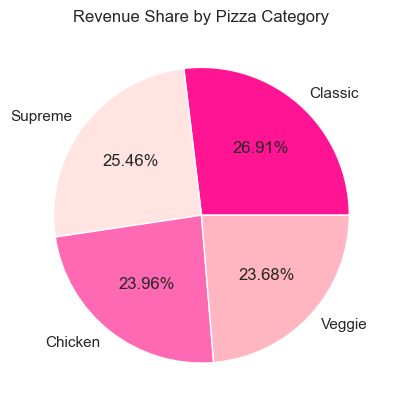

In [40]:
#using pie chart to show the percentage of each pizza category

plt.pie( pizza_category['total_sales'], labels=pizza_category['category'], autopct='%1.2f%%', colors=['deeppink', 'mistyrose', 'hotpink', 'lightpink'])

plt.title("Revenue Share by Pizza Category")

plt.show()

The **Classic** and **Supreme** pizza categories generate the highest revenue which shows they are the most popular among customers.


## Average Pizza Sold

In [41]:
# Calculating Average Pizzas per Order

pizzas_per_order = pizza_sales.groupby('order_id')['quantity'].sum().mean()

print(f"Average Pizzas per Order: {pizzas_per_order:.2f}")

Average Pizzas per Order: 2.32


The average pizzas per order is **2.32**, which suggests customers purchase multiple pizzas for families or social gathering

## Average Amount Spent for Pizza

In [44]:
# Grouping the order ids with the total sales to get the amount spent by a single customer order.

average_amount = pizza_sales.groupby('order_id')['total_sales'].sum().mean()

average_amount

np.float64(38.30726229508197)

On average, customers spend **38.3** per a single order.